# SymPy 2020-2021 Documentation Survey Analysis

SymPy ran a user survey about its documentation from November 29, 2021 to January 5, 2022. The primary purpose of the survey was to guide the SymPy Documentation work of Aaron Meurer as part of the [CZI EOSS cycle 4 grant](https://groups.google.com/g/sympy/c/vYsavewGj1w/m/CQKTSznPAgAJ). 

A total of 67 people responded. The survey was done on Google Surveys and was shared on the SymPy public mailing list and the [@SymPy](https://twitter.com/SymPy) Twitter account. The survey consisted of 5 questions, all of which were optional. The results of these responses are summarized here. We would like to thank everyone who took and shared the survey.

A detailed analysis of the responses is provided below. At a high-level, there are three main takeaways from the results:

1. The main SymPy documentation site (https://docs.sympy.org) is overwhelmingly the most popular resource that people use to get help with SymPy. This is true across all levels of experience. It is clear that the majority of the SymPy development team's documentation efforts should be made on the documentation site.

2. There are many improvements that need to be made to the overall layout and organization of SymPy documentation site In particular, there are four improvements that would generally benefit:
   - The docs need better top-level organization. Some of this has already been done in our [development documentation](https://docs.sympy.org/dev/index.html) as part of the 2021 Season of Docs project by Joannah Nanjekye, but this is not yet visible to most users.
   - The docs could use a better Sphinx theme that provides better sidebar navigation. Some work is already being done to improve this.
   - The docs have many large pages which would benefit from being split into smaller pages.
   - There are several issues with the SymPy Live extension.

3. We have been able to identify some primary areas of documentation that should be prioritized for the CZI project. Additionally, StackOverflow is a popular resource and we will therefore make heavy use of it for identifying areas where documentation needs improvement.

In [1]:
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt

import textwrap

# Set the plot format to SVG for better quality plots
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
df = pandas.read_csv('responses.csv')

In [3]:
# The data contains some columns from questions that weren't actually on the survey. Remove those.
bad_keys = []
for key in df.keys():
    if df[key].isna().all():
        bad_keys.append(key)
df = df.drop(columns=bad_keys)

In [4]:
timestamp, undocumented, other_examples, other_comments, resources, experience_level = df.columns

In [5]:
def flattened_series(s):
    return pandas.Series(
        np.concatenate(
            np.array(s.apply(
                lambda i: [] if 
                pandas.isna(i) else i.split(', ')))))

## Experience Level

The first question asked the respondents to place their SymPy experience level on a scale of 1 to 5, with 1 being "novice user" and 5 being "expert user".

Most respondents self-reported a mid-level experience with SymPy. 

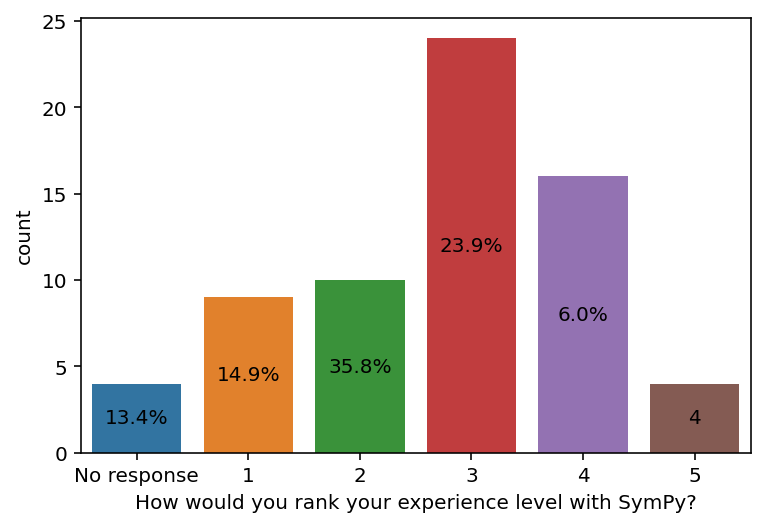

In [6]:
vals = df[experience_level].dropna().astype(int).value_counts(sort=False).sort_index()
levels = len(df[experience_level])
percents = ["%.1f%%" % i for i in vals/levels*100]

ax = seaborn.countplot(df[experience_level].fillna(0).astype(int))
ax.bar_label(ax.containers[0], percents, label_type='center')
ax.set_xticklabels(['No response', 1, 2, 3, 4, 5])
experience_bar_colors = [i.get_facecolor() for i in ax.containers[0].get_children()]

## Documentation Resources

The next question asked respondents to select which resources they use when getting help with SymPy. Multiple selections were allowed. A free-form "other" option was included, although none of the 67 respondents chose it.

The main takeaways here are:

- Almost all respondents (91%) use the documentation website. Therefore, it is clear that most of the documentation efforts should be placed on the website, or on documentation that will end up on the website such as docstrings.
- StackOverflow is the next most popular, with 70.1% of respondents choosing it. This suggests two things:
  - It would be beneficial for those with expert knowledge of SymPy, such as the core development team, to spend efforts on answering StackOverflow questions, as these can have a large reach to the user base, and having experts answer questions can raise the quality of the answers there.
  - It is clear that many users are going to StackOverflow instead of the main documentation site. Reasons for this may be because the quality of the documentation site is lower than StackOverflow, because it has lower search engine ranking, or because it lacks the answer to the users' questions (survey respondents were not asked why they may prefer one resource to another). Consequently, StackOverflow may be a good resource for determining which parts of the documentation to improve. StackOverflow questions are conveniently ranked and categorized, so it would not be difficult to use it to determine which are the most common issues encountered by users.
- The "official" SymPy community groups are less popular for getting help. These include things like the issue tracker (26.9%), the mailing list (11.9% of respondents), GitHub discussions (10.4%), and the Gitter chat room (7.5%). These are notable because they are all places where the core development team are most likely to provide help. Some suggested courses of action here would be:
  - Better promote these resources. Given the popularity of the documentation site in the responses, it may be prudent to place prominent links to these there.
  - Lower the barriers of participation in these, if possible (e.g., all require either a Google or GitHub login to use). For instance, the community might consider using a more user-friendly alternative such as Discourse. 
  - Encourage the core development team to focus their support efforts in places where users are actually going, such as StackOverflow.  
- Roughly a third of respondents get help via reading the docstrings directly ("reading the SymPy source code directly", "the ? function in IPython or Jupyter notebooks", and "the help() function"). These methods all work by showing the docstring of a function directly. Reading docstrings directly has two downsides:
  1. the RST rendering of the docstring is not shown, meaning things like inline LaTeX math can be difficult to read, and 
  2. it biases towards help that is written in docstrings, i.e., "reference documentation". Long-form user guides and tutorials are not in docstrings and thus cannot be accessed via these methods. They can only be accessed on the main documentation site. 
  
  Most of SymPy's existing documentation exists as reference documentation in docstrings. However, a large goal of the CZI grant work is to improve the scope of user guides and tutorials. 
  
  Even so, there may be benefits to either making docstrings more readable in their plain-text form, or by making use of and improving tools to render the RST in places like IPython and Jupyter, such as the currently-in-development [Papyri](https://github.com/jupyter/papyri) tool, which is currently funded by a different CZI EOSS cycle 4 grant.
- The Gitter chat room is the least popular response, with only 7.5% of respondents claiming to use it. It may be worth revisiting whether the chatroom is beneficial to the community. 

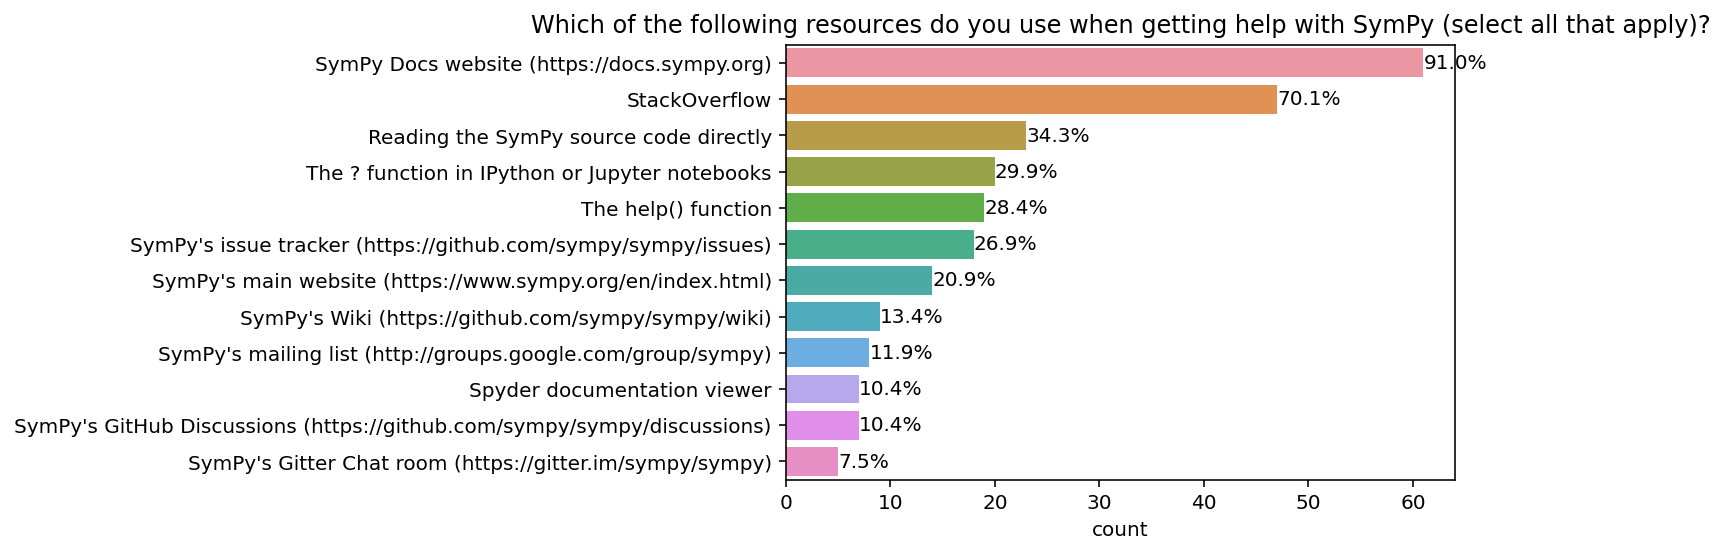

In [7]:
s = flattened_series(df[resources])
vals = s.groupby(s).size().sort_values(ascending=False)
levels = len(df[resources])
percents = ["%.1f%%" % i for i in vals/levels*100]
ax = seaborn.countplot(y=s, order=vals.index)
ax.set_title(resources)
ax.bar_label(ax.containers[0], percents, label_type='edge');
# Save the colors for the plot below (which we have to do with plain matplotlib)
resources_bar_colors = [i.get_facecolor() for i in ax.containers[0].get_children()][::-1]

In [8]:
all_resources = sorted(set(flattened_series(df[resources])), key=lambda i: vals[i])

for r in all_resources:
    df[r] = df[resources].fillna('').apply(lambda x: r in x)
    
resources_by_experience = df.groupby(df[experience_level].fillna(0))[all_resources].sum()

Finally, we examine if the resources used by respondents have any correlation with their reported SymPy experience level. The following plots show each question faceted by the other. In the plots below, the bars are sorted in the same order as in the plot above, from most to least total responses.

The takeaways here are:

- There are not many differences among experience levels. In particular, the main documentation site is the most common place to get help across all levels of experience. StackOverflow is also popular among all but the highest level of experience.
- The "official" SymPy discussion groups such as the mailing list, issue tracker, and Gitter Chat room are slightly more used by users with higher levels of SymPy experience. 
- Methods that involve reading docstrings in their raw form ("reading the source code directly", "the ? function in IPython/Jupyter notebooks", and "the help function") are also slightly more favored by users with higher levels of experience.

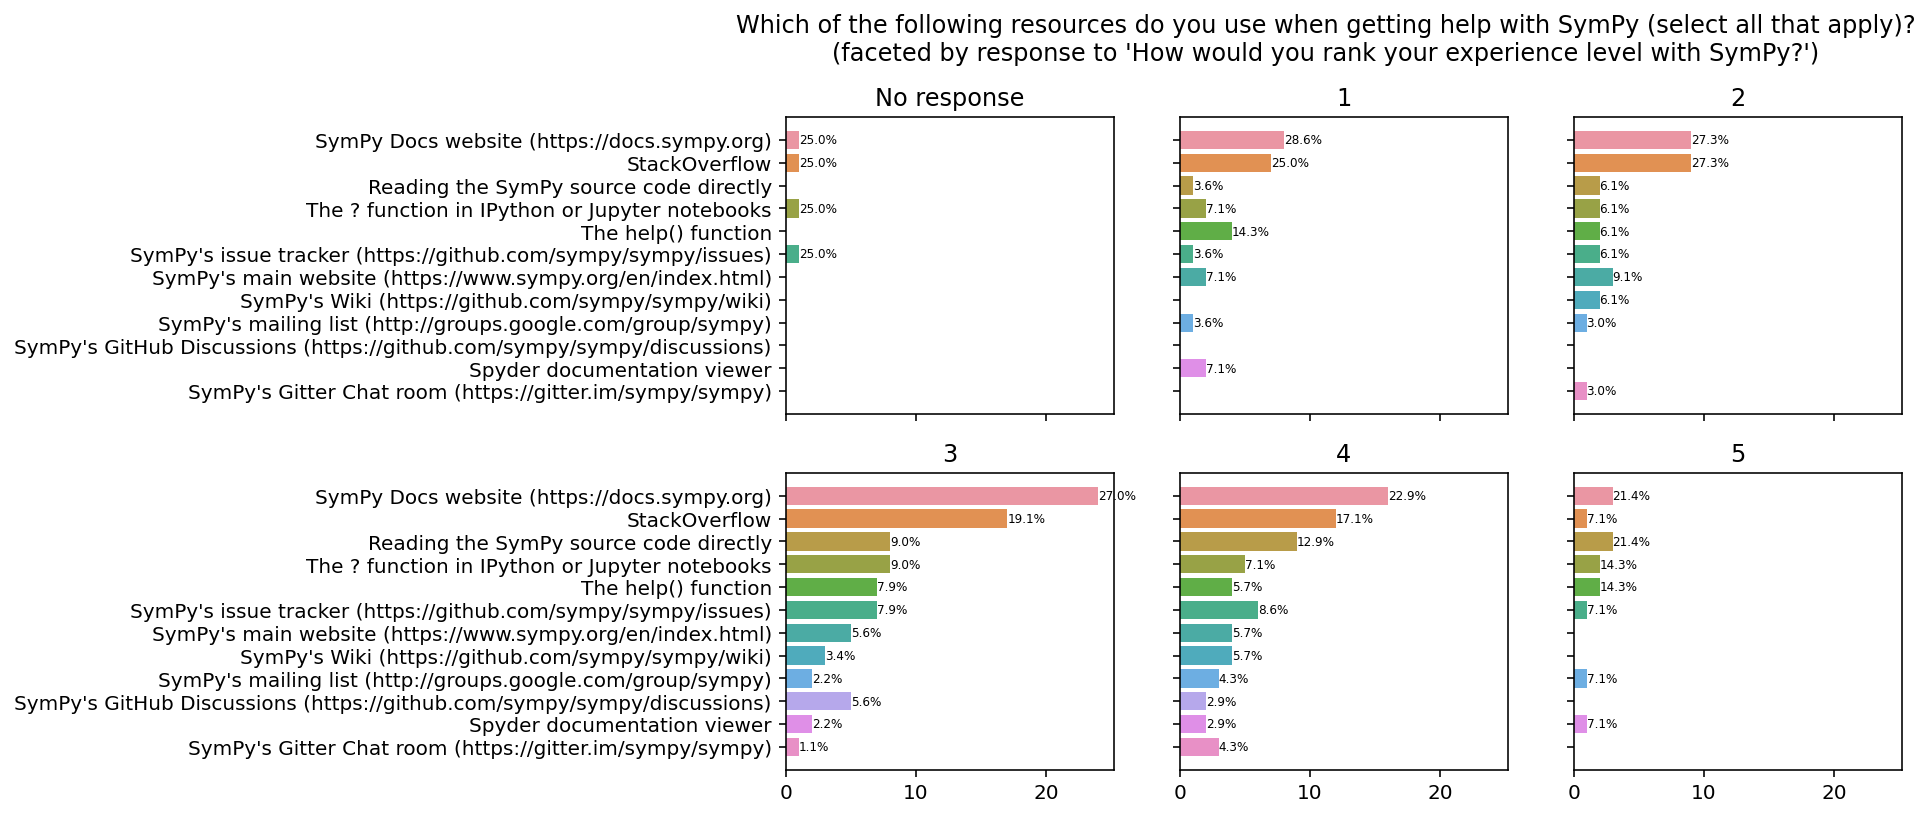

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(10, 6))
for i in range(6):
    d = resources_by_experience.iloc[i]
    percents = ["%.1f%%" % i if i else '' for i in d/d.sum()*100]
    
    ax = axes.flat[i]
    ax.barh(d.index, d, color=resources_bar_colors)
    ax.bar_label(ax.containers[0], percents, label_type='edge', fontsize=6)
    ax.set_title(i if i else 'No response')
fig.suptitle(resources + f'\n(faceted by response to {experience_level!r})', y=1);

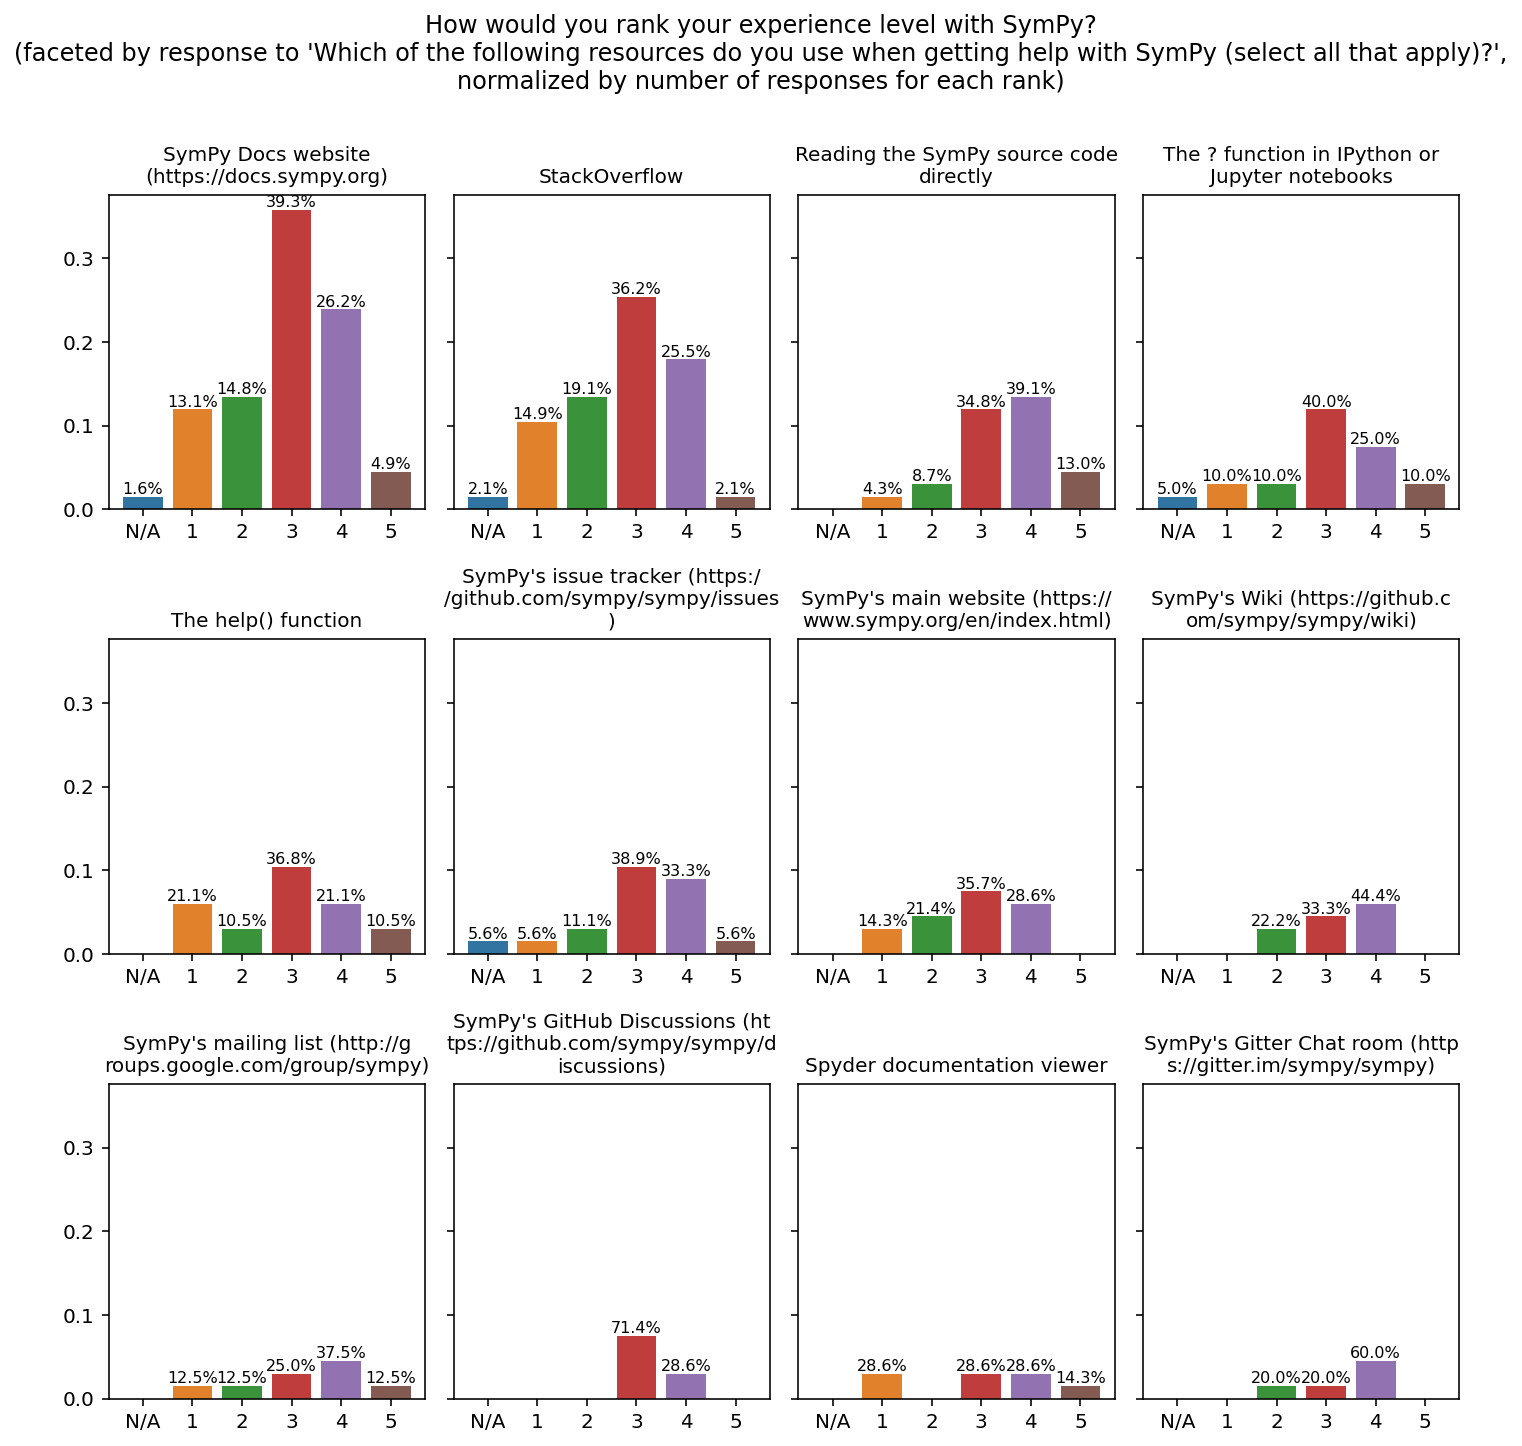

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, sharey=True, figsize=(10, 10))
for i in range(12):
    ax = axes.flat[i]
    resource = all_resources[::-1][i]
    d = resources_by_experience[resource]        
    percents = ["%.1f%%" % i if i else '' for i in d/d.sum()*100]

    ax.bar(d.index, d/df[experience_level].fillna(0).astype(int).count(), color=experience_bar_colors)
    ax.bar_label(ax.containers[0], percents, label_type='edge', fontsize=8)
    ax.set_title(textwrap.fill(resource, 30), fontsize=10)
    ax.set_xticks(range(6))
    ax.set_xticklabels(['N/A', '1', '2', '3', '4', '5'])

fig.suptitle(experience_level + f'\n(faceted by response to {resources!r},\nnormalized by number of responses for each rank)', y=1)
fig.tight_layout()

Finally the survey contained three free response questions: 

1. "What areas of SymPy do you feel are not documented well enough?"

2. "Are there any examples of documentation (not necessarily from SymPy or even the Python ecosystem) that you think we should emulate or learn from when developing SymPy's documentation?"

3. "Are there any other comments you'd like to make?"

The answers to these questions are not shown here because the survey stated "All responses will remain private." However, some key points from each question are summarized below.

In [11]:
def print_answers(col):
    i = 1
    for e, v in df[[experience_level,col]].iloc:
        if pandas.isna(v):
            continue
        print(f"{i}. {v.strip()} (experience level: {int(e) if not pandas.isna(e) else 'N/A'})\n")
        i += 1

There were 35 responses to the question "what areas of SymPy do you feel are not documented well enough?". Here is a summary of the things that were requested, sorted by most commonly requested. Note that some responses did not make any specific requests and are not included in any of the topics. The numbers indicate which responses specified each topic.

```
Solving real problems (physics, mechanics, math) (1, 2, 6, 8, 13, 20, 24, 33, 34)
Solvers (3, 6, 16, 18, 19, 26, 28, 31, 32)

Core/Expression manipulation (2, 6, 23, 28, 35)

Assumptions (10, 17, 23)
Interface with other libraries/lambdify (7, 13, 18)
Vector submodule (5, 28, 32)

Best practices (10, 20)
Explain how different parts interact with each other (7, 12)
Matrices (6, 12)
Plotting (6, 15)
Polys (16, 22)
Stats (12, 21)

Basic introduction (9)
Better examples (5)
Differential geometry (30)
How to write tests (11)
Integration/differentiation (6)
```

The most commonly requested items were more examples showing solving real world problems from physics, mechanics, and mathematics, and more guides on using the solvers submodule. The next most common request was guides to the core and basic expression manipulation. There is a long tail of topics that were only requested by one or two people. This is somewhat consistent with the responses to another survey that the SymPy development team ran in 2018, which found, among other things, that there is a long tail of usage among SymPy's many submodules, with some submodules being used by almost everyone (like solvers), but even the least popular being used by at least someone. 

In [12]:
# print_answers(undocumented)

There were 29 responses to the question "are there any examples of documentation (not necessarily from SymPy or even the Python ecosystem) that you think we should emulate or learn from when developing SymPy's documentation?". Here is a summary of the responses, sorted alphabetically. Note that some responses did not include any specific examples and are not included in any of the resources. The numbers indicate which responses specified each resource.

```
Better organization with things like sidebars (e.g., readthedocs) (6, 22)
Cadabra (25)
Diátaxis framework (20
Django (17)
Julia (15)
Keras (9)
Mathematica (29)
Mozilla/MDN (2, 7)
NumPy (3, 7, 14, 16, 21, 24, 26, 28)
PGF/TikZ (4)
Pandas (3, 7, 21, 27)
Pytorch (19)
Robert Johansson's works (10)
SciPy (14)
StackOverflow (28)
Tensorflow (12)
jQuery (7)
scikit-learn (11, 13, 23)
xarray (27)
```

NumPy was the most commonly given example of good documentation. There is obvious sampling bias—most respondents are also likely to be NumPy users—but considering that NumPy has recently made many pushes to improve their own documentation, it would be worth investigating its documentation and finding out what works there.

Not everyone was specific about what they liked about the other documentation resources, but for those who were, the most common things requested were better examples (especially real-world examples), better organization, and better layout of the documentation site (e.g., using a better sidebar a la those found on Read the Docs). Some of these things may already be addressed in our development documentation thanks to the work of our 2021 Google Season of Docs project by Joannah Nanjekye, which reorganized our documentation to follow the [Diátaxis framework](https://diataxis.fr/).

Given that there is sampling bias, and given that one of the purposes of the question was to discover high quality pieces of documentation that we were not previously aware of, we do plan to take some time to look over the all the examples in the responses. 

In [13]:
# print_answers(other_examples)

Finally, 28 people responded to "Are there any other comments you'd like to make?". Here is a summary of some things that stood out. 

- Many people used this as an opportunity to express how much they like SymPy and to thank the developers.

- Many people want the general layout and organization of the documentation to be improved. Work on reorganizing the general top-level layout has already been done (the 2021 Season of Docs project). Work on using a better Sphinx theme with a easier sidebar navigation is in progress. Work on splitting pages with a large number of functions is also in progress (multiple people mentioned this as an issue).

- Someone asked if development documentation could be provided. We already have development documentation at https://docs.sympy.org/dev, but this is apparently not discoverable enough in the current layout.

- Some people complained about the SymPy Live shell being in the way and breaking copy-paste in examples, and not being a more modern tool that runs in the browser. Others acclaimed the shell.

- Many people emphasized the importance of examples in documentation. One person complained that the math in the examples is too advanced to follow.

- Step-by-step solutions are a relatively common feature request (unfortunately, this would need to be implemented in SymPy and is out scope for documentation).

- People indicated that they primarily use Google to search when getting help (Google was unfortunately not included in the "what resources do you use to get help with SymPy?" question above). Therefore it may be valuable to make changes that would improve SEO of the documentation.

- Two different people said they are a "simp for SymPy".

In [14]:
# print_answers(other_comments)